In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Imports

In [ ]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
import numpy as np
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
import tensorflow as tf 
from tensorflow import keras
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Dataset

In [ ]:
import pandas as pd
data = pd.read_excel("/content/drive/MyDrive/Mestrado/Datasets/oportunidades_classificacao_4.xlsx", sheet_name='Oportunidades')

In [ ]:
import requests
import pandas as pd
url = 'https://github.com/chap0lin/nlp_datasets/blob/master/oportunidades_classificacao_4.xlsx?raw=true'
r = requests.get(url)
open('temp.xlsx', 'wb').write(r.content)
data = pd.read_excel('temp.xlsx', sheet_name='Oportunidades')

In [ ]:
print(data.shape)
data.sample(5)

(357, 11)


,opo_titulo,link,opo_texto,opo_texto_ele,opo_brazil,opo_tipo,opo_deadline,codigo,atualizacao,clas,comentario
25,Request for Quotations: Contractor to Develop ...,https://www.nfwf.org/media-center/announcement...,The National Fish and Wildlife Foundation (NFW...,Eligible applicants include institutions of hi...,N,other,"April 21, 2021",nfwf_210429_1_004,210429,N,0
204,Call for proposals under the Polish Returns NA...,https://euraxess.ec.europa.eu//jobs/funding/ca...,Outline The aim of the Polish Returns NAWA Pro...,Outline The aim of the Polish Returns NAWA Pro...,N,grant,29/07/2021,euraxess_210602_1_001,210602,N,NaN
338,The Ulam NAWA Programme,https://nawa.gov.pl//en/programy-nawa/programy...,The aim of the Ulam Programme is to increase t...,The aim of the Ulam Programme is to increase t...,N,grant,15.06.2021,nawa_210525_1_001,210525,N,NaN
350,NUTRITION,http://www.waterloofoundation.org.uk/WorldDeve...,World development NUTRITION A well-nourished p...,World development NUTRITION A well-nourished p...,N,grant,31 de dezembro de 2021,waterloofoundation_210601_1_001,210601,N,NaN
232,SEAL OF EXCELLENCE @ UNISI,https://euraxess.ec.europa.eu//jobs/funding/se...,The MSCA Seal of Excellence @ UNISI initiative...,The MSCA Seal of Excellence @ UNISI initiative...,N,grant,04/06/2021,euraxess_210602_1_029,210602,NaN,NÃO FOI POSSIVEL DETERMINAR


In [ ]:
data['clas'].value_counts()

Y    152
N    108
Name: clas, dtype: int64

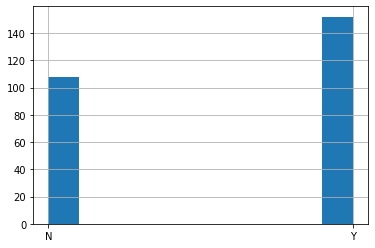

In [ ]:
data['clas'].hist()

In [ ]:
sentences = data['opo_texto']
labels = data['clas']

In [ ]:
print(len(sentences), " - ", len(labels))

357  -  357


In [ ]:
newdata = data.copy()
# subSampleBalanced.drop(subSampleBalanced[subSampleBalanced['category'] == 'business'].sample(frac=0.9).index)
# newdata = newdata.drop(newdata[newdata['clas'] != 'Y' or newdata['clas'] != 'N'].index)
# df[(df.line_race != 0) & (df.line_race != 10)]
newdata = newdata[(newdata['clas'] == 'Y') | (newdata['clas'] == 'N')]
sentences = newdata['opo_texto']
labels = newdata['clas']
print(len(sentences), " - ", len(labels))

260  -  260


In [ ]:
labels = np.where(labels == "Y", 1, 0)

## Pré-processamento / Text Normalization

## Feature Engineering

### Train Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(sentences, labels, test_size=0.20, random_state=32)

Calculando vocab size

In [ ]:
alltext = ""
for s in x_train:
  alltext+= s
for s in x_test:
  alltext+= s

vocab = nltk.word_tokenize(alltext)
vocab1 = set(vocab)
print(len(vocab1))

12881


One hot encoding

In [ ]:
my_vocab_size = len(vocab1)
encoded_sent_train = [one_hot(i, my_vocab_size) for i in x_train]
encoded_sent_test = [one_hot(i, my_vocab_size) for i in x_test]
print(encoded_sent_train[0])

[9013, 6773, 5708, 3894, 3022, 9013, 5708, 3360, 240, 1662, 5769, 9889, 2417, 6804, 5302, 12187, 6374, 576, 6861, 7846, 1101, 6457, 38, 9491, 10202, 7714, 12340, 9471, 5187, 11915, 3555, 1714, 11482, 8887, 11924, 9491, 3360, 5708, 1354, 12340, 7021, 4437, 1300, 240, 2309, 11915, 7650, 11482, 5302, 3911, 1292, 8383, 1300, 6773, 5708, 3360, 1662, 2636, 10122, 11901, 3360, 6363, 9802, 10202, 11915, 5025, 7364, 3142, 1714, 6423, 11915, 7322, 3894, 5925, 5302, 3911, 1292, 2893, 3894, 2983, 7364, 12340, 10836, 3894, 305, 11679, 3524, 9680, 5779, 3360, 9620, 11630, 11099, 5205, 2262, 3360, 12340, 5667, 3303, 7618, 6804, 3894, 1361, 3894, 1714, 5963, 3911, 1662, 6586, 5302, 7322, 9013, 5025, 12449, 4807, 7364, 1214, 1714, 6423, 2464, 2567, 10103, 7625, 1063, 3456, 4571, 4807, 2134, 1577, 11918, 3360, 11750, 5302, 3894, 3022, 11915, 6866, 2019, 7550, 10253, 10202, 10267, 1300, 3911, 3894, 7279, 11308, 4561, 4605, 2893, 6804, 5302, 10202, 10267, 11915, 6866, 7469, 6212, 1577, 4745, 1534, 532, 62

In [ ]:
max_size = 0
for sent in encoded_sent_train:
  if len(sent) > max_size:
    max_size = len(sent)
for sent in encoded_sent_test:
  if len(sent) > max_size:
    max_size = len(sent)
print(max_size)

5302


In [ ]:
length = max_size
X_train = pad_sequences(encoded_sent_train, maxlen=length, padding='pre')
X_test = pad_sequences(encoded_sent_test, maxlen=length, padding='pre')
print(X_train)

[[    0     0     0 ...  4748   398 10727]
 [    0     0     0 ... 10052  5447   431]
 [    0     0     0 ...  6804 11651  6866]
 ...
 [    0     0     0 ...  5302  5516  9329]
 [    0     0     0 ...  2055  9927  2009]
 [    0     0     0 ...  6804  5302 12856]]


## Modelo

In [ ]:
mymodel = Sequential()

mymodel.add(Embedding(my_vocab_size, 64, input_length=length))
mymodel.add(Dropout(0.5))

# Conv1D + global max pooling
mymodel.add(Conv1D(128, 7, padding="valid", activation="relu", strides=3))
mymodel.add(Conv1D(128, 7, padding="valid", activation="relu", strides=3))
mymodel.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
mymodel.add(Dense(128, activation="relu"))
mymodel.add(Dropout(0.5))

mymodel.add(Flatten())
mymodel.add(Dense(1, activation='sigmoid'))

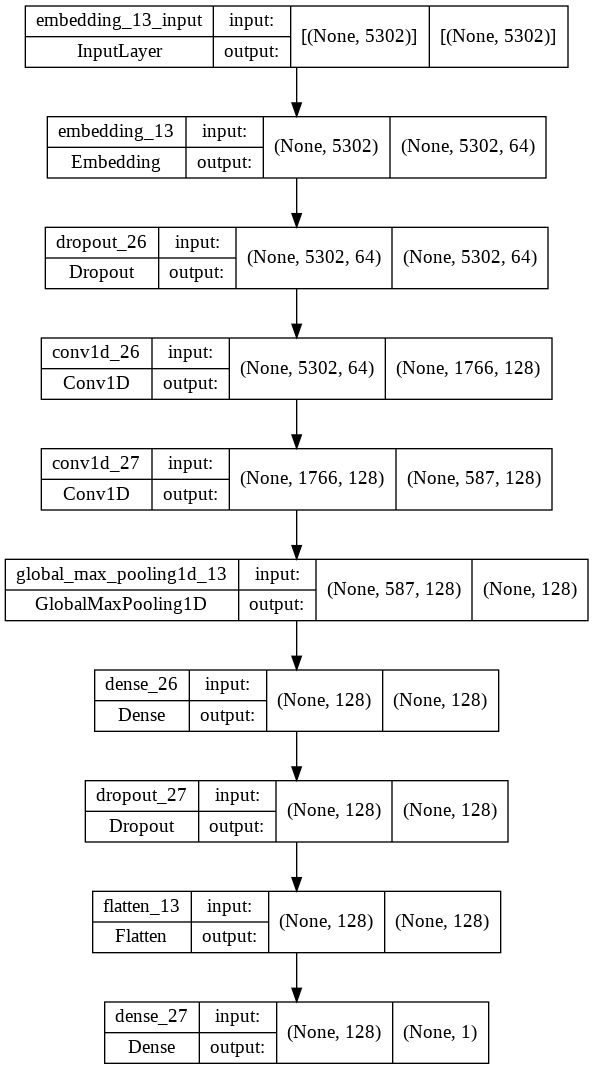

In [ ]:
keras.utils.plot_model(mymodel, show_shapes=True)

In [ ]:
# add checkpoint to save the network and stop if training doesn't improve
filepath = "best weights.h5"
checkpoint = keras.callbacks.ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
earlystop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)
callbacks_list = [checkpoint]

mymodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# fiting  the model
history = mymodel.fit(X_train, y_train, epochs=100, callbacks=callbacks_list, verbose=True, validation_data=(X_test, y_test), batch_size=128)

# evaluate the model
modelloss, modelaccuracy = mymodel.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %f' % (modelaccuracy*100))

Epoch 1/100
2/2 [==============================] - ETA: 0s - loss: 0.6874 - accuracy: 0.5769
Epoch 1: val_accuracy improved from -inf to 0.55769, saving model to best weights.h5
2/2 [==============================] - 2s 473ms/step - loss: 0.6874 - accuracy: 0.5769 - val_loss: 0.6868 - val_accuracy: 0.5577
Epoch 2/100
2/2 [==============================] - ETA: 0s - loss: 0.6813 - accuracy: 0.5913
Epoch 2: val_accuracy did not improve from 0.55769
2/2 [==============================] - 0s 169ms/step - loss: 0.6813 - accuracy: 0.5913 - val_loss: 0.6862 - val_accuracy: 0.5577
Epoch 3/100
2/2 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.5913
Epoch 3: val_accuracy did not improve from 0.55769
2/2 [==============================] - 0s 154ms/step - loss: 0.6848 - accuracy: 0.5913 - val_loss: 0.6859 - val_accuracy: 0.5577
Epoch 4/100
2/2 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.5913
Epoch 4: val_accuracy did not improve from 0.55769
2/2

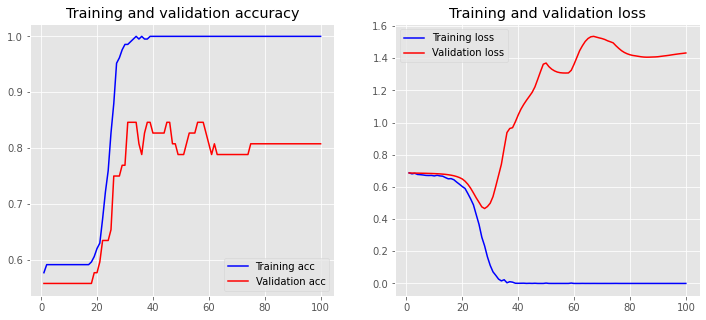

In [ ]:
plot_history(history)